<a href="https://colab.research.google.com/github/MajitoFlores/Introducci-n-a-Python/blob/main/Caso_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CASO 1: Análisis de las Cajas de Ahorro

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Datos originales
data = {
    "Empresa": [
        "El Corte Inglés", "Iberdrola", "Repsol Comercial",
        "Seat", "Tabacalera", "FASA Renault",
        "Repsol Petróleo", "Pryca", "Iberia"
    ],
    "Ventas": [775.104, 775.218, 700.963, 674.063, 537.744, 489.155, 448.465, 448.465, 445.853],
    "Beneficios": [23.795, 58.778, 1.531, -12.756, 14.729, 9.059, 12.541, 13.495, -34.824]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Tipificación manual
ventas_mean = df["Ventas"].mean()
ventas_std = df["Ventas"].std()
benef_mean = df["Beneficios"].mean()
benef_std = df["Beneficios"].std()

df["Ventas_tip"] = (df["Ventas"] - ventas_mean) / ventas_std
df["Beneficios_tip"] = (df["Beneficios"] - benef_mean) / benef_std

# Construcción de la matriz de datos tipificados
X = df[["Ventas_tip", "Beneficios_tip"]].values

# Análisis de componentes principales (PCA manual)
# Calcular la matriz de covarianza
cov_matrix = np.cov(X.T)

# Obtener autovalores y autovectores
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Ordenar autovalores y autovectores
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Transformar los datos al espacio de los componentes principales
X_pca = X.dot(eigenvectors)

# Paso 6: Agregar resultados al DataFrame
df["CP1"] = X_pca[:, 0]
df["CP2"] = X_pca[:, 1]

# Mostrar tabla final
print(df)


            Empresa   Ventas  Beneficios  Ventas_tip  Beneficios_tip  \
0   El Corte Inglés  775.104      23.795    1.313819        0.556530   
1         Iberdrola  775.218      58.778    1.314621        1.927519   
2  Repsol Comercial  700.963       1.531    0.792273       -0.315999   
3              Seat  674.063     -12.756    0.603044       -0.875908   
4        Tabacalera  537.744      14.729   -0.355895        0.201233   
5      FASA Renault  489.155       9.059   -0.697696       -0.020975   
6   Repsol Petróleo  448.465      12.541   -0.983930        0.115485   
7             Pryca  448.465      13.495   -0.983930        0.152872   
8            Iberia  445.853     -34.824   -1.002305       -1.740756   

        CP1       CP2  
0  1.322537 -0.535484  
1  2.292539  0.433384  
2  0.336776 -0.783666  
3 -0.192944 -1.045777  
4 -0.109363  0.393949  
5 -0.508177  0.478513  
6 -0.614084  0.777404  
7 -0.587647  0.803841  
8 -1.939637 -0.522164  


Gráfica de la dispersión de los datos.

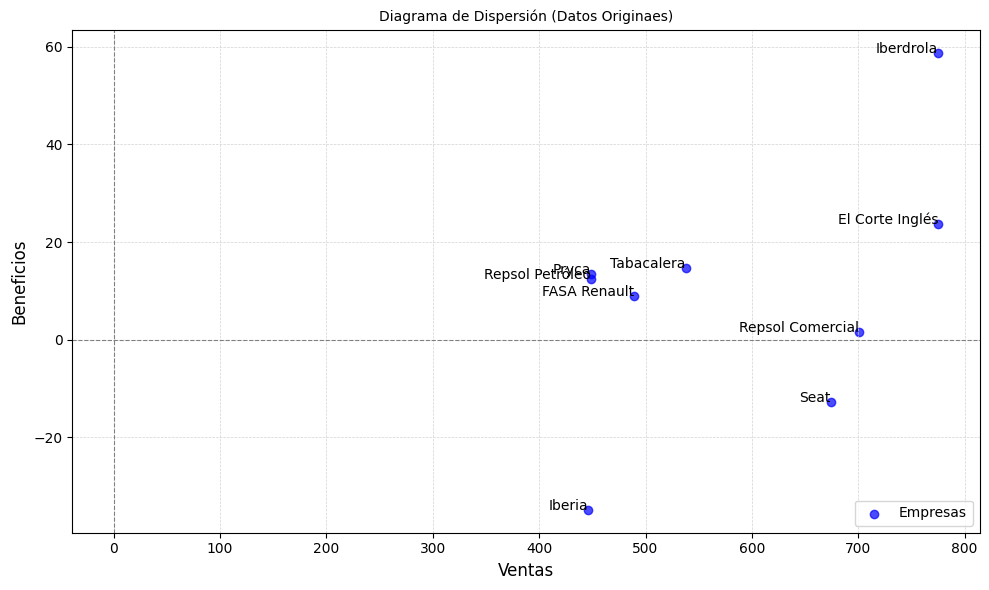

In [5]:
import matplotlib.pyplot as plt
import pandas as pd  # Import pandas here
import numpy as np # Import numpy here

# Datos originales
data = {
    "Empresa": [
        "El Corte Inglés", "Iberdrola", "Repsol Comercial",
        "Seat", "Tabacalera", "FASA Renault",
        "Repsol Petróleo", "Pryca", "Iberia"
    ],
    "Ventas": [775.104, 775.218, 700.963, 674.063, 537.744, 489.155, 448.465, 448.465, 445.853],
    "Beneficios": [23.795, 58.778, 1.531, -12.756, 14.729, 9.059, 12.541, 13.495, -34.824]
}

# Crear DataFrame
df = pd.DataFrame(data) # Re-create the DataFrame 'df'

# Tipificación manual
ventas_mean = df["Ventas"].mean()
ventas_std = df["Ventas"].std()
benef_mean = df["Beneficios"].mean()
benef_std = df["Beneficios"].std()

df["Ventas_tip"] = (df["Ventas"] - ventas_mean) / ventas_std
df["Beneficios_tip"] = (df["Beneficios"] - benef_mean) / benef_std

# Crear el diagrama de dispersión
plt.figure(figsize=(10, 6))  # Tamaño del gráfico

# Dibujar los puntos
plt.scatter(df["Ventas"], df["Beneficios"], color="blue", alpha=0.7, label="Empresas")

# Añadir etiquetas de las empresas
for i, empresa in enumerate(df["Empresa"]):
    plt.text(df["Ventas"].iloc[i], df["Beneficios"].iloc[i], empresa, fontsize=10, ha="right")

# Configuración del gráfico
plt.title("Diagrama de Dispersión (Datos Originaes)", fontsize=10)
plt.xlabel("Ventas", fontsize=12)
plt.ylabel("Beneficios", fontsize=12)
plt.axhline(0, color='gray', linewidth=0.8, linestyle="--")  # Línea horizontal en 0
plt.axvline(0, color='gray', linewidth=0.8, linestyle="--")  # Línea vertical en 0
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()

# Paso 3: Mostrar el gráfico
plt.show()

Matriz de Correlación

In [ ]:
# Calcular la matriz de correlación muestral
correlation_matrix = df[["Ventas_tip", "Beneficios_tip"]].corr()

# Mostrar solo los valores de la matriz
print(correlation_matrix.values)




[[1.        0.4887887]
 [0.4887887 1.       ]]


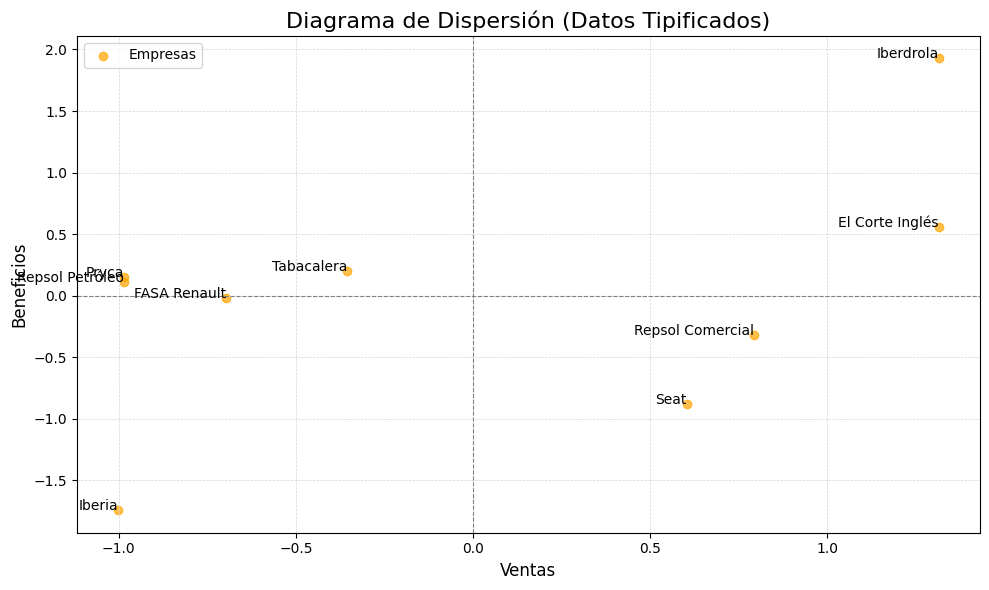

In [ ]:
import matplotlib.pyplot as plt

# Crear el diagrama de dispersión con datos tipificados
plt.figure(figsize=(10, 6))  # Tamaño del gráfico

# Dibujar los puntos
plt.scatter(df["Ventas_tip"], df["Beneficios_tip"], color="orange", alpha=0.7, label="Empresas")

# Añadir etiquetas de las empresas
for i, empresa in enumerate(df["Empresa"]):
    plt.text(df["Ventas_tip"].iloc[i], df["Beneficios_tip"].iloc[i], empresa, fontsize=10, ha="right")

# Configuración del gráfico
plt.title("Diagrama de Dispersión (Datos Tipificados)", fontsize=16)
plt.xlabel("Ventas", fontsize=12)
plt.ylabel("Beneficios", fontsize=12)
plt.axhline(0, color='gray', linewidth=0.8, linestyle="--")  # Línea horizontal en 0
plt.axvline(0, color='gray', linewidth=0.8, linestyle="--")  # Línea vertical en 0
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()

# Paso 3: Mostrar el gráfico
plt.show()


Raíces características

In [ ]:
# Calcular las raíces características (valores propios)
eigenvalues, _ = np.linalg.eig(correlation_matrix)

# Mostrar las raíces características como una lista
print("Raíces características de la matriz de correlación muestral:")
for i, eigenvalue in enumerate(eigenvalues, start=1):
    print(f"Raíz característica {i}: {eigenvalue:.4f}")


Raíces características de la matriz de correlación muestral:
Raíz característica 1: 1.4888
Raíz característica 2: 0.5112


Vectores

In [ ]:
# Mostrar los vectores propios
print("Vectores propios de la matriz de correlación muestral:")
for i, vector in enumerate(eigenvectors.T, start=1):  # Transponer para acceder por columnas
    print(f"Vector propio {i}: {vector}")


Vectores propios de la matriz de correlación muestral:
Vector propio 1: [0.70710678 0.70710678]
Vector propio 2: [-0.70710678  0.70710678]


In [ ]:
# Paso 3: Verificar la ortogonalidad entre los vectores propios
print("Verificación de ortogonalidad:")
for i in range(len(eigenvectors)):
    for j in range(i + 1, len(eigenvectors)):
        dot_product = np.dot(eigenvectors[:, i], eigenvectors[:, j])
        print(f"Producto escalar entre Vector {i+1} y Vector {j+1}: {dot_product:.4f}")


Verificación de ortogonalidad:
Producto escalar entre Vector 1 y Vector 2: 0.0000


Matriz factorial

In [ ]:
# Proyectar los datos sobre las componentes principales
components = np.dot(df_std[['Ventas', 'Beneficios']], eigenvectors)

# Crear un DataFrame con las componentes principales
df_components = pd.DataFrame(components, columns=["Componente 1", "Componente 2"])

# Calcular las correlaciones entre las componentes principales y las variables originales
correlation_with_components = pd.DataFrame({
    'Ventas': [df_components['Componente 1'].corr(df_std['Ventas']), df_components['Componente 2'].corr(df_std['Ventas'])],
    'Beneficios': [df_components['Componente 1'].corr(df_std['Beneficios']), df_components['Componente 2'].corr(df_std['Beneficios'])]
}, index=["Componente 1", "Componente 2"])

# Mostrar la matriz de correlación entre las componentes y las variables originales
print(correlation_with_components)



                Ventas  Beneficios
Componente 1  0.862783    0.862783
Componente 2 -0.505575    0.505575


Cálculo de PCA

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Supongamos que tienes un DataFrame df con las variables originales 'Ventas' y 'Beneficios'
# Primero estandarizamos los datos
scaler = StandardScaler()
df_std = scaler.fit_transform(df[['Ventas', 'Beneficios']])

# Realizamos el análisis de componentes principales
pca = PCA()
pca.fit(df_std)

# 1. Matriz de coeficientes (cargas de las componentes)
# La matriz de coeficientes es la matriz de vectores propios
# Cada columna de esta matriz es un vector propio
coeficientes = pca.components_.T  # Matriz transpuesta para tener las variables en filas
coeficientes_df = pd.DataFrame(coeficientes, columns=[f'Componente {i+1}' for i in range(coeficientes.shape[1])],
                               index=['Ventas', 'Beneficios'])
# 2. Puntuaciones de las componentes (cómo se calculan los factores)
# Las puntuaciones de los factores son la proyección de los datos estandarizados sobre las componentes
puntuaciones = pca.transform(df_std)
puntuaciones_df = pd.DataFrame(puntuaciones, columns=[f'Componente {i+1}' for i in range(puntuaciones.shape[1])])

print("\nPuntuaciones de las componentes principales para cada observación (empresa):")
print(puntuaciones_df)



Puntuaciones de las componentes principales para cada observación (empresa):
   Componente 1  Componente 2
0      1.402762      0.567966
1      2.431605     -0.459674
2      0.357205      0.831203
3     -0.204648      1.109214
4     -0.115997     -0.417846
5     -0.539003     -0.507540
6     -0.651334     -0.824561
7     -0.623294     -0.852602
8     -2.057296      0.553839


CASO 2: Cálculo de las componentes principales para las empresas españolas de mayores ventas

Variables Originales

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Datos
data = {
    "Empresa": ["A","B", "C", "D", "E", "F", "G", "H", "I"],
    "N": [228, 228, 229, 225, 229, 229, 229, 229, 224],
    "Mínimo": [-298.976, 4, -237.938, 25, -24.730, 15.117, 467, 2.531, np.nan],
    "Máximo": [95.118, 74.437, 425.802, 463.480, 1_488.378, 1_271.510, 3_568.851, 3_917.167, np.nan],
    "Media": [-454.64, 3_414.73, 5_177.33, 21_253.09, 48_706.76, 93_049.92, 94_807.96, 132_565.34, np.nan],
    "Desviación típica": [26_660.576, 7_284.485, 39_219.096, 53_342.723, 136_059.6, 154_491.7, 340_634.4, 373_675.6, np.nan]
}
# Crear DataFrame
df2 = pd.DataFrame(data, index=[
    "A", "B", "C", "D", "E",
    "F", "G", "H", "I"
])

# Mostrar tabla
print(df2)




  Empresa    N   Mínimo    Máximo      Media  Desviación típica
A       A  228 -298.976    95.118    -454.64          26660.576
B       B  228    4.000    74.437    3414.73           7284.485
C       C  229 -237.938   425.802    5177.33          39219.096
D       D  225   25.000   463.480   21253.09          53342.723
E       E  229  -24.730  1488.378   48706.76         136059.600
F       F  229   15.117  1271.510   93049.92         154491.700
G       G  229  467.000  3568.851   94807.96         340634.400
H       H  229    2.531  3917.167  132565.34         373675.600
I       I  224      NaN       NaN        NaN                NaN


Variables Ratios

In [ ]:
import pandas as pd

# Datos extraídos de la imagen
data = {
    "N": [228, 229, 228, 229, 225, 229, 228, 224],
    "Mínimo": [-1.66, 21.32, 22.60, 0.05, 23.75, 0.11, 2.08, np.nan],
    "Máximo": [0.59, 0.61, 11.95, 0.98, 91.00, 7.69, 1803.39, np.nan],
    "Media": [-0.0108, 0.0358, 0.1766, 0.4810, 0.5805, 1.4773, 81.2738, np.nan],
    "Desviación típica": [0.18319, 0.17741, 1.31545, 0.24932, 6.55932, 1.26805, 197.09268, np.nan]
}

# Crear nombres de variables
variables = [
    "Ratio 1 A",
    "Ratio 2 B",
    "Ratio 3 C",
    "Ratio 4 D",
    "Ratio 5 E",
    "Ratio 6 F",
    "Ratio 7 G",
    "Ratio 8 H"
]

# Crear DataFrame con los datos
df = pd.DataFrame(data, index=variables)

# Redondear valores a 5 decimales para coincidir con la tabla
df = df.round(5)

# Mostrar tabla
print(df)

# Exportar como CSV opcional
df.to_csv("tabla_descriptiva_spss.csv", index=True)


             N  Mínimo   Máximo    Media  Desviación típica
Ratio 1 A  228   -1.66     0.59  -0.0108            0.18319
Ratio 2 B  229   21.32     0.61   0.0358            0.17741
Ratio 3 C  228   22.60    11.95   0.1766            1.31545
Ratio 4 D  229    0.05     0.98   0.4810            0.24932
Ratio 5 E  225   23.75    91.00   0.5805            6.55932
Ratio 6 F  229    0.11     7.69   1.4773            1.26805
Ratio 7 G  228    2.08  1803.39  81.2738          197.09268
Ratio 8 H  224     NaN      NaN      NaN                NaN


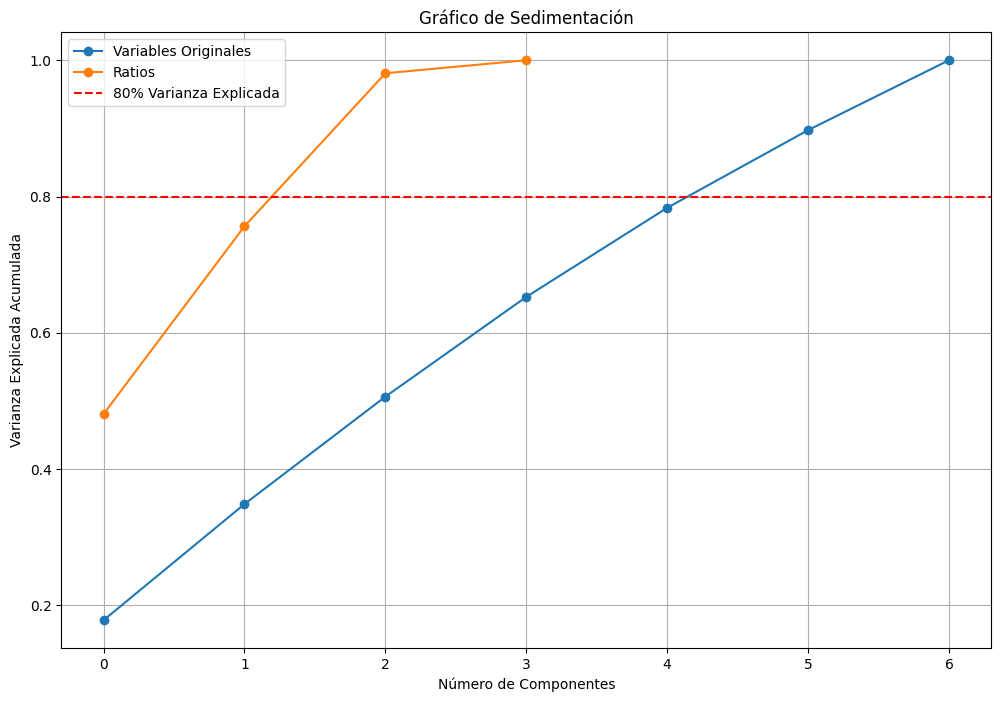


Matriz de Correlación - Variables Originales:
             Ventas   Capital   Recprop    Acttot  Beneficio   Inmovil  \
Ventas     1.000000 -0.081067  0.111657  0.004276  -0.103316 -0.011535   
Capital   -0.081067  1.000000  0.003697  0.029509  -0.187451  0.096887   
Recprop    0.111657  0.003697  1.000000  0.003564  -0.022975  0.110277   
Acttot     0.004276  0.029509  0.003564  1.000000   0.058451 -0.025599   
Beneficio -0.103316 -0.187451 -0.022975  0.058451   1.000000  0.006543   
Inmovil   -0.011535  0.096887  0.110277 -0.025599   0.006543  1.000000   
Cashflow  -0.138958  0.018323  0.018792 -0.040083   0.067217  0.023927   

           Cashflow  
Ventas    -0.138958  
Capital    0.018323  
Recprop    0.018792  
Acttot    -0.040083  
Beneficio  0.067217  
Inmovil    0.023927  
Cashflow   1.000000  

Matriz de Correlación - Ratios:
                   Beneficio/Ventas  Cashflow/Ventas  Beneficio/Recprop  \
Beneficio/Ventas           1.000000         0.911166           0.011508   
C

<ipython-input-58-40d2fefc4d3c>:129: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


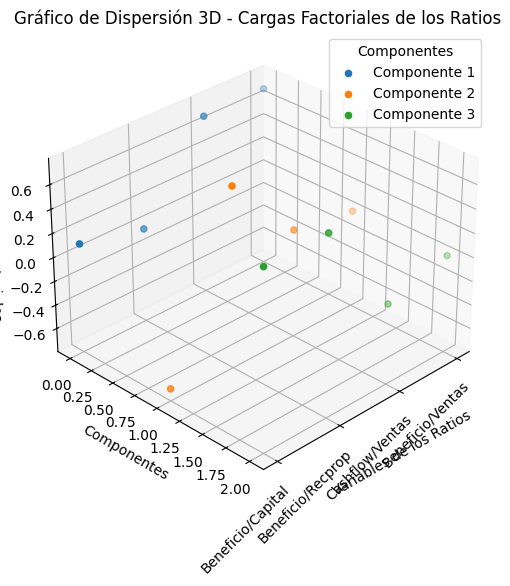

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Simulación del conjunto de datos basado en el primer caso
np.random.seed(42)

# Generar datos para "variables originales"
datos_originales = {
    'Ventas': np.random.normal(500000, 200000, 229),
    'Capital': np.random.normal(250000, 100000, 229),
    'Recprop': np.random.normal(300000, 150000, 229),
    'Acttot': np.random.normal(600000, 250000, 229),
    'Beneficio': np.random.normal(100000, 50000, 229),
    'Inmovil': np.random.normal(200000, 80000, 229),
    'Cashflow': np.random.normal(150000, 60000, 229),
}

# Crear ratios basados en las variables
df_original = pd.DataFrame(datos_originales)
df_ratios = pd.DataFrame({
    'Beneficio/Ventas': df_original['Beneficio'] / df_original['Ventas'],
    'Cashflow/Ventas': df_original['Cashflow'] / df_original['Ventas'],
    'Beneficio/Recprop': df_original['Beneficio'] / df_original['Recprop'],
    'Beneficio/Capital': df_original['Beneficio'] / df_original['Capital']
})

# Estandarizar los datos
escalador = StandardScaler()
df_original_estandarizado = escalador.fit_transform(df_original)
df_ratios_estandarizado = escalador.fit_transform(df_ratios)

# Realizar PCA para las variables originales
pca_original = PCA()
pca_original.fit(df_original_estandarizado)
varianza_explicada_original = pca_original.explained_variance_ratio_

# Realizar PCA para los ratios
pca_ratios = PCA()
pca_ratios.fit(df_ratios_estandarizado)
varianza_explicada_ratios = pca_ratios.explained_variance_ratio_

# Crear gráfico de sedimentación (Scree Plot) para ambos
plt.figure(figsize=(12, 8))
plt.plot(np.cumsum(varianza_explicada_original), marker='o', label='Variables Originales')
plt.plot(np.cumsum(varianza_explicada_ratios), marker='o', label='Ratios')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Varianza Explicada')
plt.title('Gráfico de Sedimentación')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.legend()
plt.grid()
plt.show()

# Calcular las matrices de correlación para las variables originales y los ratios
matriz_correlacion_original = pd.DataFrame(df_original_estandarizado, columns=df_original.columns).corr()
matriz_correlacion_ratios = pd.DataFrame(df_ratios_estandarizado, columns=df_ratios.columns).corr()

# Seleccionar el número de componentes que explican el 80% de la varianza
n_componentes_original = np.argmax(np.cumsum(varianza_explicada_original) >= 0.8) + 1
n_componentes_ratios = np.argmax(np.cumsum(varianza_explicada_ratios) >= 0.8) + 1

# Realizar PCA con los componentes seleccionados
pca_original_reducido = PCA(n_components=n_componentes_original)
df_original_pca = pca_original_reducido.fit_transform(df_original_estandarizado)

pca_ratios_reducido = PCA(n_components=n_componentes_ratios)
df_ratios_pca = pca_ratios_reducido.fit_transform(df_ratios_estandarizado)

# Obtener las cargas factoriales para ambos
cargas_factoriales_original = pd.DataFrame(
    pca_original_reducido.components_.T,
    index=df_original.columns,
    columns=[f'Componente_{i+1}' for i in range(n_componentes_original)]
)

cargas_factoriales_ratios = pd.DataFrame(
    pca_ratios_reducido.components_.T,
    index=df_ratios.columns,
    columns=[f'Componente_{i+1}' for i in range(n_componentes_ratios)]
)

# Mostrar todos los resultados
print("\nMatriz de Correlación - Variables Originales:")
print(matriz_correlacion_original)

print("\nMatriz de Correlación - Ratios:")
print(matriz_correlacion_ratios)

print("\nMatriz Factorial - Variables Originales:")
print(cargas_factoriales_original)

print("\nMatriz Factorial - Ratios:")
print(cargas_factoriales_ratios)


from mpl_toolkits.mplot3d import Axes3D

# Crear gráfico 3D de dispersión para las cargas factoriales de los ratios
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

x_coords = np.arange(len(cargas_factoriales_ratios))

# Graficar los puntos de dispersión para las cargas factoriales de los primeros tres componentes
for i in range(n_componentes_ratios):
    ax.scatter(x_coords,
               [i] * len(cargas_factoriales_ratios),
               cargas_factoriales_ratios[f'Componente_{i+1}'],
               label=f'Componente {i+1}')

ax.set_xticks(x_coords)
ax.set_xticklabels(cargas_factoriales_ratios.index, rotation=45, ha= 'right' )

# Etiquetas y título
ax.set_title('Gráfico de Dispersión 3D - Cargas Factoriales de los Ratios')
ax.set_xlabel('Variables de los Ratios')
ax.set_ylabel('Componentes')
ax.set_zlabel('Cargas Factoriales')

# Añadir leyenda
ax.legend(title='Componentes')

# Rotar el gráfico para una mejor visualización
ax.view_init(azim=45, elev=30)

plt.tight_layout()

# Mostrar el gráfico
plt.show()





CASO 3

Autovalores Iniciales
    Componente  Total  Porcentaje de varianza  Porcentaje acumulado
0            1  4.451                  12.031                12.031
1            2  4.006                  10.826                22.857
2            3  2.530                   6.837                29.693
3            4  2.487                   6.722                36.415
4            5  2.390                   6.459                42.875
5            6  1.760                   4.756                47.630
6            7  1.646                   4.447                52.078
7            8  1.536                   4.152                56.229
8            9  1.381                   3.732                59.961
9           10  1.286                   3.476                63.437
10          11  1.205                   3.257                66.695
11          12  1.171                   3.166                69.860
12          13  1.129                   3.050                72.911
13          14  1.101     

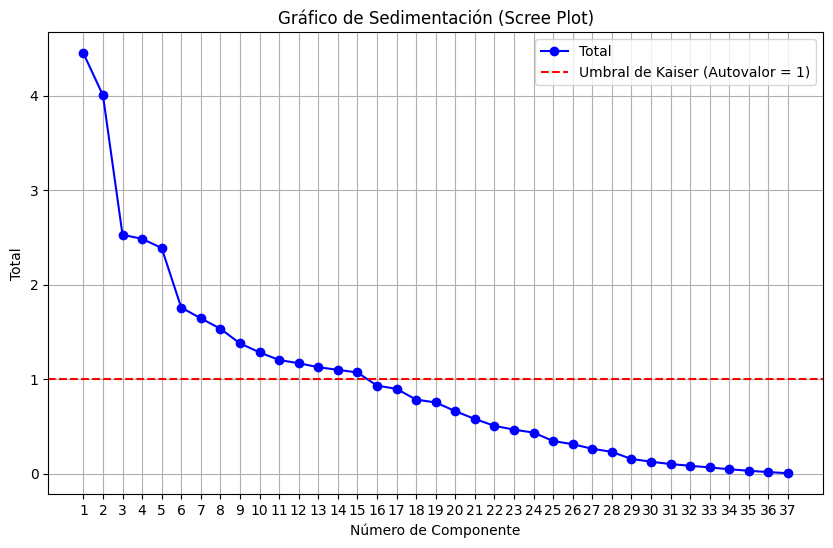

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Crear un DataFrame con los datos de las tablas (valores extraídos manualmente)
data = {
    "Componente": list(range(1, 38)),  # Cambia según el número de componentes
    "Total": [
        4.451, 4.006, 2.530, 2.487, 2.390, 1.760, 1.646, 1.536, 1.381, 1.286, 1.205,
        1.171, 1.129, 1.101, 1.073, 0.934, 0.900, 0.786, 0.756, 0.664, 0.581, 0.509, 0.468, 0.437, 0.348,
        0.314, 0.266, 0.233, 0.158, 0.129, 0.104, 0.086, 0.068, 0.049, 0.033, 0.019, 0.007
    ],
    "Porcentaje de varianza": [
        12.031, 10.826, 6.837, 6.722, 6.459, 4.756, 4.447, 4.152, 3.732, 3.476, 3.257, 3.166,
        3.050, 2.975, 2.900, 2.525, 2.433, 2.125, 2.043, 1.794, 1.570, 1.375, 1.265, 1.180, 0.941, 0.848,
        0.720 ,0.630, 0.427, 0.350, 0.282, 0.232, 0.184, 0.133, 0.089, 0.051, 0.019
    ],
    "Porcentaje acumulado": [
        12.031, 22.857, 29.693, 36.415, 42.875, 47.630, 52.078, 56.229, 59.961, 63.437, 66.695, 69.860, 72.911,
        75.885, 78.785, 81.310, 83.743, 85.868, 87.911, 89.705, 91.275, 92.650, 93.915, 95.095, 96.036, 96.883, 97.603, 98.233,
        98.660, 99.010, 99.292, 99.524, 99.708, 99.841, 99.930, 99.981, 100.000
    ]
}

df = pd.DataFrame(data)

# Mostrar la tabla
print("Autovalores Iniciales")
print(df)

data = {
    "Componente": list(range(1, 38)),  # Cambia según el número de componentes
    "Total": [
        4.451, 4.006, 2.530, 2.487, 2.390, 1.760, 1.646, 1.536, 1.381, 1.286, 1.205,
        1.171, 1.129, 1.101, 1.073, 0.934, 0.900, 0.786, 0.756, 0.664, 0.581, 0.509, 0.468, 0.437, 0.348,
        0.314, 0.266, 0.233, 0.158, 0.129, 0.104, 0.086, 0.068, 0.049, 0.033, 0.019, 0.007
    ],
    "Porcentaje de varianza": [
        12.031, 10.826, 6.837, 6.722, 6.459, 4.756, 4.447, 4.152, 3.732, 3.476, 3.257, 3.166,
        3.050, 2.975, 2.900, 2.525, 2.433, 2.125, 2.043, 1.794, 1.570, 1.375, 1.265, 1.180, 0.941, 0.848,
        0.720 ,0.630, 0.427, 0.350, 0.282, 0.232, 0.184, 0.133, 0.089, 0.051, 0.019
    ],
    "Porcentaje acumulado": [
        12.031, 22.857, 29.693, 36.415, 42.875, 47.630, 52.078, 56.229, 59.961, 63.437, 66.695, 69.860, 72.911,
        75.885, 78.785, 81.310, 83.743, 85.868, 87.911, 89.705, 91.275, 92.650, 93.915, 95.095, 96.036, 96.883, 97.603, 98.233,
        98.660, 99.010, 99.292, 99.524, 99.708, 99.841, 99.930, 99.981, 100.000
    ]
}

df = pd.DataFrame(data)

# Mostrar la tabla
print("Sumas de las saturaciones al cuadrado de la extracción")
print(df)


# Datos del análisis de componentes principales
data = {
    "Componente": list(range(1, 38)),
    "Total": [
        4.451, 4.006, 2.530, 2.487, 2.390, 1.760, 1.646, 1.536, 1.381, 1.286, 1.205, 1.171,
        1.129, 1.101, 1.073, 0.934, 0.900, 0.786, 0.756, 0.664, 0.581, 0.509, 0.468, 0.437, 0.348,
        0.314, 0.266, 0.233, 0.158, 0.129, 0.104, 0.086, 0.068, 0.049, 0.033, 0.019, 0.007
    ]
}
df = pd.DataFrame(data)

# Crear el gráfico de sedimentación
plt.figure(figsize=(10, 6))
plt.plot(df["Componente"], df["Total"], marker='o', linestyle='-', color='blue', label="Total")
plt.axhline(y=1, color="red", linestyle="--", label="Umbral de Kaiser (Autovalor = 1)")

# Configurar el gráfico
plt.title("Gráfico de Sedimentación (Scree Plot)")
plt.xlabel("Número de Componente")
plt.ylabel("Total")
plt.xticks(df["Componente"])  # Mostrar todos los componentes en el eje x
plt.legend()
plt.grid()

# Mostrar la gráfica
plt.show()



In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generar datos de ejemplo con 15 variables (puedes reemplazar estos datos por los tuyos)
np.random.seed(42)  # Fijar semilla para reproducibilidad

data = {
    "Variable_1": np.random.normal(0.5, 0.2, 37),
    "Variable_2": np.random.normal(0.6, 0.25, 37),
    "Variable_3": np.random.normal(0.4, 0.3, 37),
    "Variable_4": np.random.normal(0.7, 0.15, 37),
    "Variable_5": np.random.normal(0.3, 0.1, 37),
    "Variable_6": np.random.normal(0.8, 0.05, 37),
    "Variable_7": np.random.normal(0.6, 0.2, 37),
    "Variable_8": np.random.normal(0.5, 0.25, 37),
    "Variable_9": np.random.normal(0.4, 0.3, 37),
    "Variable_10": np.random.normal(0.7, 0.1, 37),
    "Variable_11": np.random.normal(0.6, 0.2, 37),
    "Variable_12": np.random.normal(0.5, 0.2, 37),
    "Variable_13": np.random.normal(0.6, 0.3, 37),
    "Variable_14": np.random.normal(0.7, 0.1, 37),
    "Variable_15": np.random.normal(0.5, 0.2, 37)
}

# Convertir a un DataFrame
df = pd.DataFrame(data)

# Estandarizar los datos
escalador = StandardScaler()
df_escalado = escalador.fit_transform(df)

# Realizar PCA con 7 componentes
pca = PCA(n_components=7)
pca.fit(df_escalado)

# Obtener la matriz factorial (cargas factoriales)
cargas_factoriales = pd.DataFrame(
    pca.components_.T,  # Transpuesta para alinear las variables
    columns=[f'Componente_{i+1}' for i in range(7)],
    index=df.columns
)


matriz_correlacion = np.corrcoef(df_escalado, rowvar=False)
print("Matriz de correlación")
print(matriz_correlacion)

# Imprimir la matriz factorial
print("Matriz Factorial (Cargas de Componentes Principales):")
print(cargas_factoriales)

Matriz de correlación
[[ 1.00000000e+00  2.22950362e-02  1.64425227e-02 -4.16211464e-02
  -2.05293715e-02 -1.33379289e-01  2.85960529e-01 -2.07330440e-01
   3.57919762e-01  3.27510254e-02  2.57436630e-02  6.25239254e-03
   1.46089190e-02 -4.14111103e-02  2.59329870e-01]
 [ 2.22950362e-02  1.00000000e+00 -6.75268707e-02  3.09759288e-02
  -1.10388062e-01 -4.63722041e-02  1.08765364e-02  2.51290182e-02
   6.11591132e-02  1.18387692e-01  6.82731939e-02  4.49276407e-02
   1.04449807e-01  5.80825597e-02  1.83905594e-01]
 [ 1.64425227e-02 -6.75268707e-02  1.00000000e+00  1.24544178e-01
   4.17623864e-02  1.98805380e-02 -1.52922689e-01 -5.95904481e-02
   1.65591416e-01  1.03713908e-01  2.57541840e-01 -1.30810387e-01
   2.54904541e-01  1.21286850e-01 -6.27855453e-02]
 [-4.16211464e-02  3.09759288e-02  1.24544178e-01  1.00000000e+00
   7.30918371e-04  1.88276760e-02 -1.34609303e-01  7.05206826e-02
   3.24843874e-02 -3.00425560e-01  1.44347749e-01  2.01465014e-01
   8.57999809e-02  3.14500078e-01

CASO 4

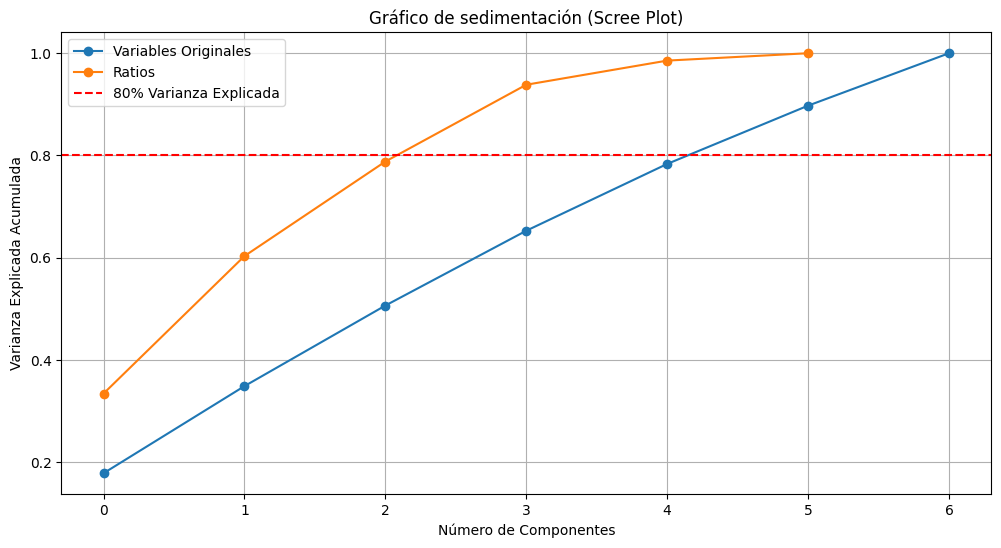


Interpretación de Componentes - Variables Originales:

Componente 1:
BENEFICIO    0.599953
CASHFLOW     0.337307
ACTTOT       0.054306
INMOVIL     -0.232950
RECPROP     -0.346610
CAPITAL     -0.366687
VENTAS      -0.463106
Name: Componente_1, dtype: float64

Componente 2:
CAPITAL      0.583758
CASHFLOW     0.450676
INMOVIL      0.383138
RECPROP     -0.013244
ACTTOT      -0.112461
BENEFICIO   -0.149469
VENTAS      -0.523602
Name: Componente_2, dtype: float64

Componente 3:
RECPROP      0.652834
INMOVIL      0.506412
BENEFICIO    0.381797
CASHFLOW     0.249843
VENTAS       0.153261
ACTTOT      -0.059269
CAPITAL     -0.286641
Name: Componente_3, dtype: float64

Componente 4:
ACTTOT       0.919344
CAPITAL      0.228829
BENEFICIO    0.195060
INMOVIL      0.127225
RECPROP      0.063898
VENTAS      -0.075324
CASHFLOW    -0.196091
Name: Componente_4, dtype: float64

Componente 5:
CASHFLOW     0.605198
RECPROP      0.378629
ACTTOT       0.238888
VENTAS       0.137056
CAPITAL      0.037529
BENE

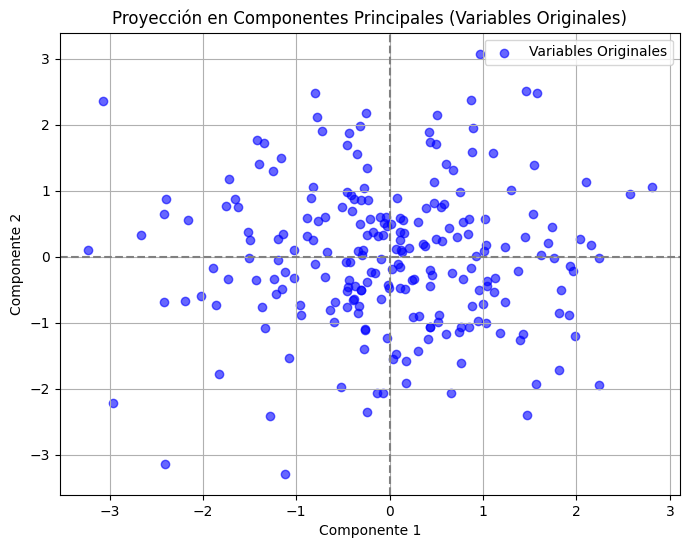

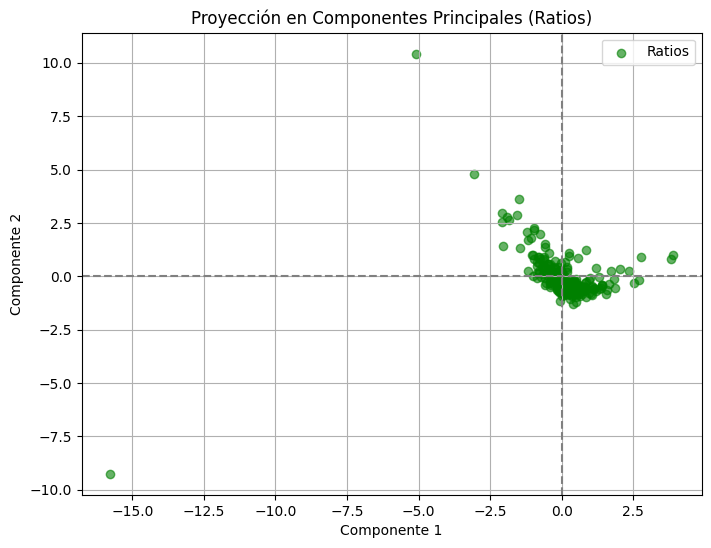


Matriz de Correlación - Variables Originales:
             VENTAS   CAPITAL   RECPROP    ACTTOT  BENEFICIO   INMOVIL  \
VENTAS     1.000000 -0.081067  0.111657  0.004276  -0.103316 -0.011535   
CAPITAL   -0.081067  1.000000  0.003697  0.029509  -0.187451  0.096887   
RECPROP    0.111657  0.003697  1.000000  0.003564  -0.022975  0.110277   
ACTTOT     0.004276  0.029509  0.003564  1.000000   0.058451 -0.025599   
BENEFICIO -0.103316 -0.187451 -0.022975  0.058451   1.000000  0.006543   
INMOVIL   -0.011535  0.096887  0.110277 -0.025599   0.006543  1.000000   
CASHFLOW  -0.138958  0.018323  0.018792 -0.040083   0.067217  0.023927   

           CASHFLOW  
VENTAS    -0.138958  
CAPITAL    0.018323  
RECPROP    0.018792  
ACTTOT    -0.040083  
BENEFICIO  0.067217  
INMOVIL    0.023927  
CASHFLOW   1.000000  

Matriz de Correlación - Ratios:
           BENRECP  CASHVENT  INMOVACT   VENTACT  VENTPLAN   BENVENT
BENRECP   1.000000 -0.007339  0.014513  0.025863 -0.107143  0.011508
CASHVENT -0.0

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Establecer datos aleatorios
np.random.seed(42)

# 1. Generar datos sintéticos para variables originales y ratios
data_original = {
    'VENTAS': np.random.normal(500000, 200000, 229),
    'CAPITAL': np.random.normal(250000, 100000, 229),
    'RECPROP': np.random.normal(300000, 150000, 229),
    'ACTTOT': np.random.normal(600000, 250000, 229),
    'BENEFICIO': np.random.normal(100000, 50000, 229),
    'INMOVIL': np.random.normal(200000, 80000, 229),
    'CASHFLOW': np.random.normal(150000, 60000, 229),
}

df_original = pd.DataFrame(data_original)

# Ratios
df_ratios = pd.DataFrame({
    'BENRECP': df_original['BENEFICIO'] / df_original['RECPROP'],
    'CASHVENT': df_original['CASHFLOW'] / df_original['VENTAS'],
    'INMOVACT': df_original['INMOVIL'] / df_original['ACTTOT'],
    'VENTACT': df_original['VENTAS'] / df_original['ACTTOT'],
    'VENTPLAN': df_original['VENTAS'] / df_original['CAPITAL'],
    'BENVENT': df_original['BENEFICIO'] / df_original['VENTAS'],
})

# Estandarizar los datos
scaler = StandardScaler()
df_original_scaled = scaler.fit_transform(df_original)
df_ratios_scaled = scaler.fit_transform(df_ratios)

# Calcular las matrices de correlación
correlation_matrix_original = pd.DataFrame(df_original_scaled, columns=df_original.columns).corr()
correlation_matrix_ratios = pd.DataFrame(df_ratios_scaled, columns=df_ratios.columns).corr()

# PCA para las variables originales
pca_original = PCA()
pca_original.fit(df_original_scaled)
explained_variance_original = np.cumsum(pca_original.explained_variance_ratio_)

# PCA para los ratios
pca_ratios = PCA()
pca_ratios.fit(df_ratios_scaled)
explained_variance_ratios = np.cumsum(pca_ratios.explained_variance_ratio_)

# Seleccionar el número de componentes para el 80% de varianza
n_components_original = np.argmax(explained_variance_original >= 0.8) + 1
n_components_ratios = np.argmax(explained_variance_ratios >= 0.8) + 1

# Gráfico de sedimentación (Scree Plot)
plt.figure(figsize=(12, 6))
plt.plot(explained_variance_original, marker='o', label='Variables Originales')
plt.plot(explained_variance_ratios, marker='o', label='Ratios')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Varianza Explicada')
plt.title('Gráfico de sedimentación (Scree Plot)')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.legend()
plt.grid()
plt.show()

# Cargas factoriales para ambos
factor_loadings_original = pd.DataFrame(
    pca_original.components_.T,
    index=df_original.columns,
    columns=[f'Componente_{i+1}' for i in range(len(df_original.columns))]
)

factor_loadings_ratios = pd.DataFrame(
    pca_ratios.components_.T,
    index=df_ratios.columns,
    columns=[f'Componente_{i+1}' for i in range(len(df_ratios.columns))]
)

# Interpretación de los componentes para las variables originales
print("\nInterpretación de Componentes - Variables Originales:")
for i in range(n_components_original):
    print(f"\nComponente {i+1}:")
    print(factor_loadings_original[f'Componente_{i+1}'].sort_values(ascending=False))

# Interpretación de los componentes para los ratios
print("\nInterpretación de Componentes - Ratios:")
for i in range(n_components_ratios):
    print(f"\nComponente {i+1}:")
    print(factor_loadings_ratios[f'Componente_{i+1}'].sort_values(ascending=False))

# Comparación entre variables originales y ratios
print("\nComparación entre Variables Originales y Ratios:")
print(f"Componentes necesarios para explicar el 80% de la varianza:")
print(f" - Variables Originales: {n_components_original} componentes")
print(f" - Ratios: {n_components_ratios} componentes")

# Gráfico de dispersión para los primeros dos componentes de las variables originales
scores_original = pca_original.transform(df_original_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(scores_original[:, 0], scores_original[:, 1], color='blue', alpha=0.6, label='Variables Originales')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('Proyección en Componentes Principales (Variables Originales)')
plt.grid()
plt.legend()
plt.show()

# Gráfico de dispersión para los primeros dos componentes de los ratios
scores_ratios = pca_ratios.transform(df_ratios_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(scores_ratios[:, 0], scores_ratios[:, 1], color='green', alpha=0.6, label='Ratios')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('Proyección en Componentes Principales (Ratios)')
plt.grid()
plt.legend()
plt.show()

# Mostrar resultados para el Caso 1
print("\nMatriz de Correlación - Variables Originales:")
print(correlation_matrix_original)

print("\nMatriz de Correlación - Ratios:")
print(correlation_matrix_ratios)

print("\nNúmero de Componentes para Variables Originales (80% Varianza):", n_components_original)
print("\nNúmero de Componentes para Ratios (80% Varianza):", n_components_ratios)

print("\nMatriz Factorial - Variables Originales:")
print(factor_loadings_original)

print("\nMatriz Factorial - Ratios:")
print(factor_loadings_ratios)
